In [1]:
import os
import pandas as pd
import numpy as np
import pyodbc

In [2]:
import pyodbc
# Download sql_data
def download_mgra_denorm_data(geo_level):
    conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                    'Server=DDAMWSQL16.sandag.org;'
                    'Database=estimates;'
                    'Trusted_Connection=yes;')
    
    with open(rf'sql_queries\mgra_denorm.sql', 'r') as sql_file:
        sql_query = sql_file.read()
    
    return  pd.read_sql_query(sql_query, conn)[['mgra', geo_level]]

In [3]:
data = pd.read_excel(r'J:\DataScience\DataQuality\QAQC\MGRA15 Input Table 2022\mgra_emp_est_minus_EDD_QA.xlsx', sheet_name='mgra_diff')
data

,mgra,est_emp,edd_emp,diff,pct_diff
0,1,22,23.000000,-1.000000,-4.347826
1,2,162,118.666667,43.333333,36.516854
2,3,302,272.000000,30.000000,11.029412
3,4,281,230.666667,50.333333,21.820809
4,5,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...
24316,24317,0,NaN,NaN,NaN
24317,24318,3,3.666667,-0.666667,-18.181818
24318,24319,0,NaN,NaN,NaN
24319,24320,0,NaN,NaN,NaN


In [4]:
jurisdiction_data = download_mgra_denorm_data(geo_level='jurisdiction')
jurisdiction_data

,mgra,jurisdiction
0,1,San Diego
1,2,San Diego
2,3,El Cajon
3,4,Encinitas
4,5,Encinitas
...,...,...
24316,24317,Unincorporated
24317,24318,Unincorporated
24318,24319,Unincorporated
24319,24320,Unincorporated


In [5]:
output_data = data.merge(jurisdiction_data, how='left', on='mgra')
output_data = output_data[['mgra', 'jurisdiction', 'est_emp', 'edd_emp', 'diff', 'pct_diff']]
output_data

,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
0,1,San Diego,22,23.000000,-1.000000,-4.347826
1,2,San Diego,162,118.666667,43.333333,36.516854
2,3,El Cajon,302,272.000000,30.000000,11.029412
3,4,Encinitas,281,230.666667,50.333333,21.820809
4,5,Encinitas,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...,...
24316,24317,Unincorporated,0,NaN,NaN,NaN
24317,24318,Unincorporated,3,3.666667,-0.666667,-18.181818
24318,24319,Unincorporated,0,NaN,NaN,NaN
24319,24320,Unincorporated,0,NaN,NaN,NaN


In [6]:
output_data

,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
0,1,San Diego,22,23.000000,-1.000000,-4.347826
1,2,San Diego,162,118.666667,43.333333,36.516854
2,3,El Cajon,302,272.000000,30.000000,11.029412
3,4,Encinitas,281,230.666667,50.333333,21.820809
4,5,Encinitas,12,27.333333,-15.333333,-56.097561
...,...,...,...,...,...,...
24316,24317,Unincorporated,0,NaN,NaN,NaN
24317,24318,Unincorporated,3,3.666667,-0.666667,-18.181818
24318,24319,Unincorporated,0,NaN,NaN,NaN
24319,24320,Unincorporated,0,NaN,NaN,NaN


In [7]:
#output_data.to_excel('mgra_diff_jurisdicition.xlsx', index=False)

In [8]:
data_2 = pd.read_excel(r'J:\DataScience\DataQuality\QAQC\MGRA15 Input Table 2022\mgra_emp_est_minus_EDD_QA.xlsx', sheet_name='mgra_sector_diff')
data_2

,mgra,sector,edd_emp,edd_emp_total,est_emp,est_emp_total,diff,edd_dist,est_dist,dist_diff
0,1,emp_accm_food,0.0,23.0,0,22,0.0,0.0,0.0,0.0
1,1,emp_ag_min,0.0,23.0,0,22,0.0,0.0,0.0,0.0
2,1,emp_bus_svcs,0.0,23.0,0,22,0.0,0.0,0.0,0.0
3,1,emp_educ,0.0,23.0,0,22,0.0,0.0,0.0,0.0
4,1,emp_ent,0.0,23.0,0,22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
291847,24311,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291848,24315,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291849,24317,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291850,24319,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN


In [9]:
output_data_2 = data_2.merge(download_mgra_denorm_data(geo_level='jurisdiction'),
             how='left',
             on='mgra')

# First, copy the column
col = output_data_2['jurisdiction']

# Then drop the column from its current place
output_data_2 = output_data_2.drop('jurisdiction', axis=1)

# Now insert the column at the desired location
output_data_2.insert(1, 'jurisdiction', col)

output_data_2

,mgra,jurisdiction,sector,edd_emp,edd_emp_total,est_emp,est_emp_total,diff,edd_dist,est_dist,dist_diff
0,1,San Diego,emp_accm_food,0.0,23.0,0,22,0.0,0.0,0.0,0.0
1,1,San Diego,emp_ag_min,0.0,23.0,0,22,0.0,0.0,0.0,0.0
2,1,San Diego,emp_bus_svcs,0.0,23.0,0,22,0.0,0.0,0.0,0.0
3,1,San Diego,emp_educ,0.0,23.0,0,22,0.0,0.0,0.0,0.0
4,1,San Diego,emp_ent,0.0,23.0,0,22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
291847,24311,Oceanside,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291848,24315,San Diego,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291849,24317,Unincorporated,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN
291850,24319,Unincorporated,emp_utl_mnf_whl,0.0,0.0,0,0,0.0,NaN,NaN,NaN


In [11]:
with pd.ExcelWriter('mgra_edd_est_diff_with_jurisdiction_update.xlsx') as writer:  
    output_data.to_excel(writer, sheet_name='mgra_diff', index=False)
    output_data_2.to_excel(writer, sheet_name='mgra_sector_diff', index=False)

In [14]:
output_data.describe()

,mgra,est_emp,edd_emp,diff,pct_diff
count,24321.000000,24321.000000,19641.000000,19641.000000,1.826300e+04
mean,12161.000000,61.617080,71.638257,3.383178,inf
std,7021.012285,241.009633,317.725356,201.039604,NaN
min,1.000000,0.000000,0.000000,-23759.000000,-1.000000e+02
25%,6081.000000,0.000000,2.000000,-2.000000,-2.941176e+01
50%,12161.000000,4.000000,7.666667,0.000000,0.000000e+00
75%,18241.000000,23.000000,36.000000,3.000000,3.333333e+01
max,24321.000000,7769.000000,25429.000000,2031.666667,inf


In [21]:
test = output_data[(output_data['diff']>-100) & (output_data['diff']< 100)]
print(test.shape)
test.head()

(18917, 6)


,mgra,jurisdiction,est_emp,edd_emp,diff,pct_diff
220,1174,San Diego,698,797.333333,-99.333333,-12.458194
221,6515,San Diego,47,146.333333,-99.333333,-67.881549
222,11302,San Diego,250,349.000000,-99.000000,-28.366762
223,8151,Chula Vista,91,190.000000,-99.000000,-52.105263
224,3645,San Diego,459,557.000000,-98.000000,-17.594255


(array([8.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 8.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 1.000e+01, 5.000e+00, 7.000e+00, 5.000e+00,
        1.400e+01, 1.300e+01, 7.000e+00, 1.400e+01, 1.600e+01, 1.800e+01,
        1.400e+01, 1.400e+01, 1.100e+01, 1.700e+01, 1.800e+01, 1.600e+01,
        2.300e+01, 2.100e+01, 2.100e+01, 2.100e+01, 2.800e+01, 3.200e+01,
        3.200e+01, 3.700e+01, 2.600e+01, 2.700e+01, 4.100e+01, 4.200e+01,
        5.400e+01, 5.500e+01, 8.100e+01, 8.500e+01, 8.400e+01, 1.180e+02,
        1.380e+02, 1.650e+02, 2.610e+02, 3.180e+02, 5.570e+02, 8.570e+02,
        1.817e+03, 5.824e+03, 3.047e+03, 1.106e+03, 6.270e+02, 3.910e+02,
        3.200e+02, 2.470e+02, 2.230e+02, 1.890e+02, 1.620e+02, 1.230e+02,
        1.180e+02, 1.050e+02, 1.050e+02, 7.500e+01, 7.100e+01, 8.500e+01,
        5.400e+01, 5.300e+01, 4.800e+01, 5.400e+01, 5.100e+01, 4.400e+01,
        3.400e+01, 4.900e+01, 3.600e+01, 4.300e+01, 3.100e+01, 2.800e+01,
        2.700e+01, 2.800e+01, 2.300e+0

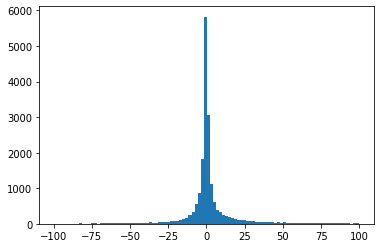

In [22]:
import matplotlib.pyplot as plt

plt.hist(test['diff'], bins=100)

In [ ]:
output_data['column_name'].plot(kind='hist', bins=10)
plt.xlabel('column_name')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()